In [1]:
import pandas as pd
import nltk
import string

### Load

In [2]:
df= pd.read_csv(r"D:\OneDrive - Universiti Sains Malaysia\USM\Y3S1\353 NLP\assg\assg1\data\cons_only.csv",encoding='latin')
df2= pd.read_csv(r"D:\OneDrive - Universiti Sains Malaysia\USM\Y3S1\353 NLP\assg\assg1\data\pros_only.csv",encoding='latin')

In [3]:
df.head()

,company,cons
0,google,Bureaucracy is slowing things down
1,google,1) Work/life balance. What balance? All those ...
2,google,"* It *is* becoming larger, and with it comes g..."
3,google,I live in SF so the commute can take between 1...
4,google,"If you don't work in MTV (HQ), you will be giv..."


In [4]:
df2.head()

,ï»¿company,pros
0,google,People are smart and friendly
1,google,"1) Food, food, food. 15+ cafes on main campus ..."
2,google,"* If you're a software engineer, you're among ..."
3,google,You can't find a more well-regarded company th...
4,google,Google is a world of its own. At every other c...


### Visualize

In [20]:
import pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [23]:
df_visualize= pd.read_csv(r"D:\OneDrive - Universiti Sains Malaysia\USM\Y3S1\353 NLP\assg\assg1\data/employee_reviews.csv", encoding='mac_roman')
df_visualize.head()

,Unnamed: 0,company,pros,cons,overall-ratings,work-balance-stars,culture-values-stars,career-opportunities-stars,comp-benefit-stars,senior-management-stars
0,1,google,People are smart and friendly,Bureaucracy is slowing things down,5,4.0,5,5.0,4.0,5.0
1,2,google,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,4,2.0,3,3.0,5.0,3.0
2,3,google,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",5,5.0,4,5.0,5.0,4.0
3,4,google,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,5,2.0,5,5.0,4.0,5.0
4,5,google,Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",5,5.0,5,5.0,5.0,5.0


In [34]:
# Label encode the 'Company' column
label_encoder = LabelEncoder()
df_visualize['company_encoded'] = label_encoder.fit_transform(df_visualize['company'])
company_labels = label_encoder.classes_

df_visualize.head()

,Unnamed: 0,company,pros,cons,overall-ratings,work-balance-stars,culture-values-stars,career-opportunities-stars,comp-benefit-stars,senior-management-stars,company_encoded
0,1,google,People are smart and friendly,Bureaucracy is slowing things down,5,4.0,5,5.0,4.0,5.0,3
1,2,google,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,4,2.0,3,3.0,5.0,3.0,3
2,3,google,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",5,5.0,4,5.0,5.0,4.0,3
3,4,google,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,5,2.0,5,5.0,4.0,5.0,3
4,5,google,Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",5,5.0,5,5.0,5.0,5.0,3


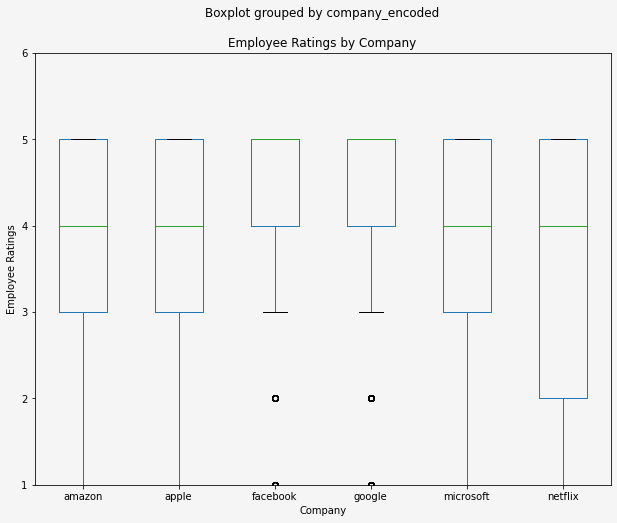

In [40]:
# Create a larger plot and change background color
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('whitesmoke')  # Changing background color of the figure

# Create the boxplot on the specified Axes object
df_visualize.boxplot(column='overall-ratings', by='company_encoded', ax=ax)

# Update x-axis labels with original company names
ax.set_xticklabels(company_labels)

# Set y-axis limits
ax.set_ylim(1, 6)  # Set the y-axis range from 1 to 7

# Add labels and title
ax.set_title('Employee Ratings by Company')
ax.set_xlabel('Company')
ax.set_ylabel('Employee Ratings')

# Show the plot
plt.grid(False)
plt.show()


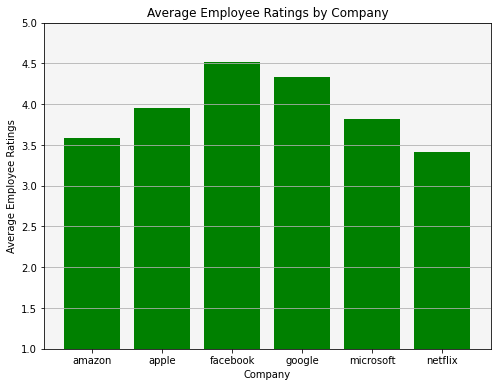

In [42]:
# Calculate average ratings per company
avg_ratings = df_visualize.groupby('company')['overall-ratings'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(avg_ratings.index, avg_ratings.values, color='green')

# Add labels and title
plt.title('Average Employee Ratings by Company')
plt.xlabel('Company')
plt.ylabel('Average Employee Ratings')

# Set y-axis limits from 1 to 5
plt.ylim(1, 5)

# Show the plot
plt.grid(axis='y')
plt.xticks(ticks=range(len(avg_ratings)), labels=company_labels)
plt.show()

### Text Preprocessing

In [13]:
import chardet

In [14]:
with open(r"D:\OneDrive - Universiti Sains Malaysia\USM\Y3S1\353 NLP\assg\assg1\data\cons_only.csv", 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'MacRoman', 'confidence': 0.724945345064363, 'language': ''}


In [ ]:
df['cons']= df['cons'].str.lower()
df2['pros']= df2['pros'].str.lower()
df.head()

In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
#",".join(stopwords.words('english'))
stopwordList=stopwords.words('english')
# stopwordList.append('#name?')
print(stopwordList)
stopword= set(stopwordList)

def remove_stopw(x):
    return " ".join([word for word in str(x).split() if word not in stopword])

df['cons']= df['cons'].apply(lambda x: remove_stopw(x))
df2['pros']= df2['pros'].apply(lambda x: remove_stopw(x))

In [ ]:
df.head()

In [ ]:
df2.head()

In [ ]:
df.to_csv(r'D:\OneDrive - Universiti Sains Malaysia\USM\Y3S1\353 NLP\assg\assg1\data\preproc\cons.csv', sep='\t',index=False)
df2.to_csv(r'D:\OneDrive - Universiti Sains Malaysia\USM\Y3S1\353 NLP\assg\assg1\data\preproc\pros.csv', sep='\t',index=False)